In [31]:
# IMPORTING All the essential Libraries
import matplotlib.pyplot as plt # for Plotting Graphs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import MaxPool2D,Conv2D,Dense,BatchNormalization,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import L2
%matplotlib inline

In [13]:
# Importing our dataset With A Batch SIZE of 32 and Image size of (32,32)
path_train="train"
path_test="test"
train_set=tf.keras.utils.image_dataset_from_directory(path_train,batch_size=32,image_size=(32,32),label_mode="binary",color_mode="rgb",seed=42)
test_set=tf.keras.utils.image_dataset_from_directory(path_test,batch_size=32,image_size=(32,32),label_mode="binary",color_mode="rgb",seed=42)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [14]:
# Data Augmentation---> Adding Some extra features so that Images can be Identified
train_set1=train_set.map(lambda x,y: (x/255,y))
train_set2=train_set.map(lambda x,y: (x/255,y))
train_set2=train_set2.map(lambda x,y: (tf.image.random_brightness(x, max_delta=0.1),y))
train_set3=train_set.map(lambda x,y: (x/255,y))
train_set3=train_set3.map(lambda x,y: (tf.image.random_contrast(x, lower=0.9, upper=1.1),y))
train_set4=train_set.map(lambda x,y: (x/255,y))
train_set4=train_set4.map(lambda x,y: (tf.image.random_flip_left_right(x),y))
train_set5=train_set.map(lambda x,y: (x/255,y))
train_set5=train_set5.map(lambda x,y: (tf.image.random_flip_up_down(x),y))
test=test_set.map(lambda x,y: (x/255,y))
train=train_set1.concatenate(train_set2).concatenate(train_set3).concatenate(train_set3).concatenate(train_set5)

In [15]:
# Choosing 1% of our traiining set as validation set
CV=train.take(int(0.01*len(train)))

In [16]:
# Defining a early_stopping algorithm by monitoring with validation set acccuracy
early_stopping=EarlyStopping(monitor="val_accuracy",patience=3,restore_best_weights=True)

In [17]:
# Defining the Model
model=Sequential()
model.add(tf.keras.Input((32,32,3)))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu",kernel_regularizer=L2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu",kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(Dense(32,activation="relu",kernel_regularizer=L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [18]:
# Model Compilation, with Adam Optimizer, BinaryCrossEntropy-Loss, and using acccuraccy metrics to check aur model
model.compile(optimizer=Adam(),loss=BinaryCrossentropy(),metrics=["accuracy"])

In [19]:
# Giving a summary of model layers and parameters
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,529 (1.03 MB)

 Trainable params: 269,441 (1.03 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [20]:
# Fitting the Training set  in the model, validating with CV data
history=model.fit(train,epochs=10,validation_data=CV,callbacks=[early_stopping])

Epoch 1/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 1058s 68ms/step - accuracy: 0.8646 - loss: 0.5283 - val_accuracy: 0.8468 - val_loss: 0.3472
Epoch 2/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 1102s 70ms/step - accuracy: 0.9343 - loss: 0.2013 - val_accuracy: 0.9509 - val_loss: 0.1439
Epoch 3/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 1202s 77ms/step - accuracy: 0.9521 - loss: 0.1536 - val_accuracy: 0.9547 - val_loss: 0.1386
Epoch 4/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 1253s 80ms/step - accuracy: 0.9631 - loss: 0.1248 - val_accuracy: 0.9758 - val_loss: 0.0899
Epoch 5/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 1188s 76ms/step - accuracy: 0.9706 - loss: 0.1015 - val_accuracy: 0.9683 - val_loss: 0.1005
Epoch 6/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 1215s 78ms/step - accuracy: 0.9763 - loss: 0.0869 - val_accuracy: 0.9539 - val_loss: 0.1470
Epoch 7/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 2784s 178ms/step - accuracy: 0.9796 - loss: 0.0762 - val_accuracy: 0.9746 - val_loss: 0.0940


In [23]:
# Plotting Diagnostic Loss Curves
def summarize_diagnostics(history):
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    plt.title("Classification Loss")
    plt.plot(history.history["loss"],label="Training Loss")
    plt.plot(history.history["val_loss"],color='r',linestyle="--",label="CV Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.subplot(2,1,2)
    plt.title("Accuracy")
    plt.plot(history.history["accuracy"],label="Training Loss")
    plt.plot(history.history["val_accuracy"],color='r',linestyle="--",label="CV Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Classification Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

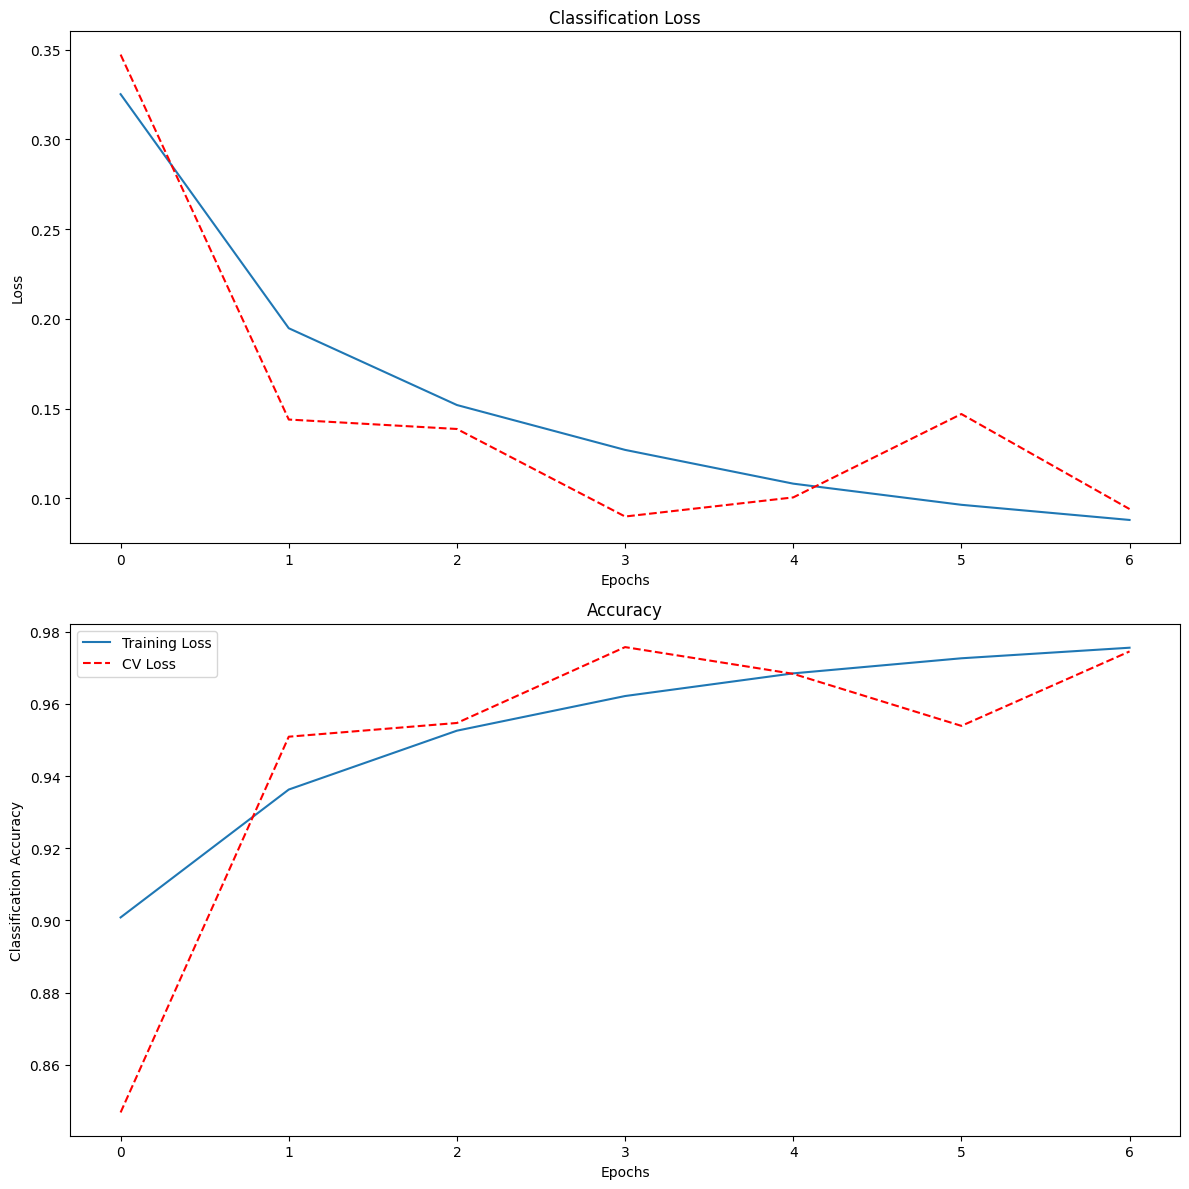

In [24]:
# Plotting the Loss and Accuracy Graphs
summarize_diagnostics(history)

In [32]:
# Test Set Accuracy
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy*100}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9500 - loss: 0.1486
Test Accuracy: 94.98500227928162


In [33]:
# Actual Train Set accuracy
train_loss, train_accuracy = model.evaluate(train_set1)
print(f'Train Accuracy: {train_accuracy*100}')

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9751 - loss: 0.0872
Train Accuracy: 97.62300252914429


In [37]:
# Saving Our model
name="model_1"
model.save(name+".keras")